# Final Analysis and Thermodynamics of Ising Model

I'm gonna do the actual data analysis on MC simulation for square lattice of $(L,L)$ dimension , for L that goes from $10$ to $70$ in steps of $5$, each simulation consists in $2*10^{6}$ calls of the $\verb|Metropolis()|$ function that does an update of the lattice ($L*L$ local updates). 
<br>
Measures are taken every $25$ MC steps

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
from matplotlib import style
import pylab
#speed things up
import numba
from numba import njit
from numba import jit
from numba import prange
#from numba_progress import ProgressBar
#from scipy.ndimage import convolve, generate_binary_structure
from timeit import default_timer as timer
from time import sleep
#style designed by me for plottin (version 2)
plt.style.use(['science','notebook','grid'])
plt.rcParams['mathtext.fontset'] = 'stix'

fig = (9,6)
params = {'figure.figsize': fig,
        'legend.fontsize': 2.5*fig[1],
         'axes.labelsize': 2.8*fig[1],
         'axes.titlesize':4*fig[1],
         'xtick.labelsize':2*fig[1],
         'ytick.labelsize':2*fig[1],
         'font.family' : 'Stixgeneral'
          }
pylab.rcParams.update(params)


In [2]:
beta_exp = np.round(np.arange(0.3,0.55,0.002), decimals=3)

In [3]:
files = np.arange(10,75,5)
for file in tqdm(files):
    filename = f"simulation_{file}.txt"
    bs, es, ms = np.loadtxt(filename, unpack=True)
    if (file==10):
        energy_mat = np.zeros((len(bs),len(files)+1))
        magnes_mat = np.zeros((len(bs),len(files)+1)) 

    energy_mat[:,int(file/5-2)] = es
    magnes_mat[:,int(file/5-2)] = ms

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
2000000/25 * len(beta_exp),len(bs)

In [17]:
@jit
def data_asmatrix(files, beta_exp, energy_mat, magnes_mat):
    magns_L=np.zeros((len(beta_exp),len(files)))
    var_magns_L=np.zeros((len(beta_exp),len(files)))
    for i in range(0,len(files)):
        as_matrix = np.column_stack((bs,magnes_mat[:,i]))
        m=[]
        v=[]
        for b in (beta_exp):
            indices = as_matrix[:,0]
            mgns = np.sum(np.abs(as_matrix[(indices == b),1]))
            var=np.var(np.abs(as_matrix[(indices == b),1]))
            mgns = mgns/(len(as_matrix[(indices == b),1]))
            m.append(mgns)
            v.append(var)
        magns_L[:,i]=m
        var_magns_L[:,i]=v
    return magns_L, var_magns_L

In [18]:
%time magns_L, var_magns_L = data_asmatrix(files, beta_exp, energy_mat, magnes_mat)

CPU times: user 49.4 s, sys: 4.44 s, total: 53.9 s
Wall time: 54.4 s


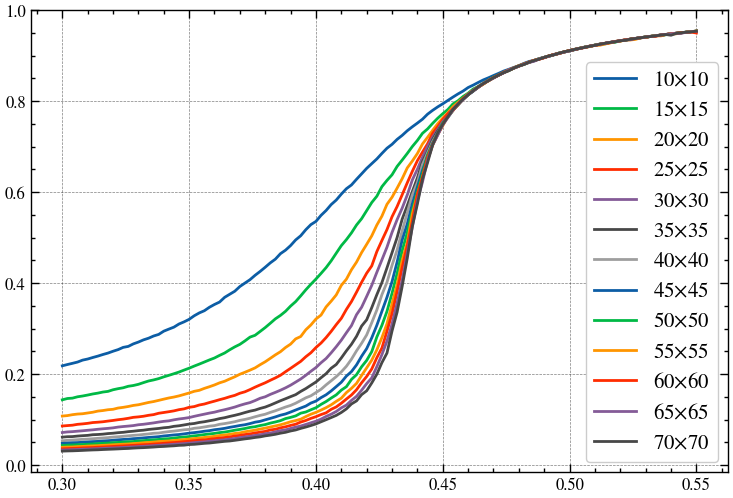

In [11]:
for file in files:
    i=int()
    plt.plot(beta_exp, magns_L[:,int(file/5 - 2)],label=rf'{file}$ \times ${file}')

plt.legend()    
plt.show()

In [ ]:
print('50%')

In [ ]:
for file in files:
    print(file/5 -1)